In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2

In [2]:
# Database connection parameters
db_params = {
    "host": "localhost",        # Replace with your PostgreSQL host
    "database": "bcb",      # Replace with your database name
    "user": "konstantinos",        # Replace with your username
    "password": "1234" # Replace with your password
}

# Establish a database connection
conn = psycopg2.connect(**db_params)

In [3]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

In [4]:
functionalities = pd.read_sql_query("SELECT * FROM functionalities", conn)

/var/folders/j9/k05ysrr550d9bhp1ns50p1hm0000gn/T/ipykernel_23920/1147858861.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  functionalities = pd.read_sql_query("SELECT * FROM functionalities", conn)


In [71]:
def draw_performance_line(d, metric, codegrid_non_gen_setting):
    
    fig, ax = plt.subplots(figsize=(13, 8))
    
    x = range(len(d))
    ax.plot(x, d[metric + '_siam'], '-*', color=colors[1], label='CodeBERT + Siamese finetuning')
    ax.plot(x, d[metric+'_cg']    , '-*', color=colors[2], label='CodeGrid')
    ax.plot([x[0], x[-1]], [codegrid_non_gen_setting, codegrid_non_gen_setting], '--', color='black', label='Codegrid non-generalization setting') 
    # ax.plot(x, d[metric + '_siam'], '-*', label='Siamese NN')
    # ax.plot(x, d[metric+'_cg']    , '-*', label='CodeGrid')
    # ax.plot([x[0], x[-1]], [codegrid_non_gen_setting, codegrid_non_gen_setting], '--', label='Codegrid non-generalization setting') 

    ax.legend(loc='best')
    ax.set_xlabel('Functionality left out')
    ax.set_ylabel(metric + ' %')
    ax.set_title('one-vs-rest on BCB')
    ax.grid()
    ax.set_xticks(x, d['name'], rotation=90)

In [58]:
i = 3
print(functionalities['description'].iloc[i])
print(functionalities['search_heuristic'].iloc[i])

1. Retrieve a zip archive (from disk, internet, etc).  2. Open the zip file, and iterate through its entries.  3. Decompress the files to disk, preserving their directory structure. Empty directories may or may not be preserved in the output.
Pattern#1: .*\.\s*getNext((Zip)|)Entry\s*\(\s*\).* AND .*((Zip)|)ArchiveEntry.*
Pattern#2: \.\s*getEntries\s*\(\s*\) AND \.\s*getInputStream\s*\( AND ((Zip)|)ArchiveEntry


### 1-vs-rest

In [ ]:
fname_results = 'result-20231124-133409.pickle'
with open(fname_results, 'rb') as handle:
    result = pickle.load(handle)

In [60]:
fcn_ids   = [2  , 3  , 4  , 5   , 6  , 7  , 8  , 9  , 10 , 12  , 13 , 14   , 15 , 17 , 18 , 19 , 21 , 22  , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 32  , 33 , 34 , 35  , 36  , 37  , 39 , 40  , 41 , 43  , 44  , 45]

f1_siam   = [687, 683, 839, 889 , 842, 670, 938, 780, 611, 747 , 528 , 593 , 839, 723, 806, 608, 680, 704 , 732, 886, 789, 612, 740, 720, 983, 884, 750 , 697, 769, 935 , 1000, 701 , 932, 707 , 607, 689 , 998 , 643]
p_siam    = [852, 930, 823, 1000, 733, 989, 974, 873, 767, 850 , 680 , 799 , 867, 729, 733, 773, 825, 990 , 652, 929, 794, 579, 710, 606, 987, 865, 1000, 852, 625, 1000, 1000, 1000, 965, 959 , 574, 953 , 1000, 880]
r_siam    = [575, 540, 857, 800 , 991, 507, 905, 706, 508, 667 , 432 , 472 , 812, 718, 895, 501, 579, 546 , 833, 848, 785, 649, 771, 887, 980, 904, 600 , 590, 1000, 878, 1000, 540 , 901, 560 , 643, 540 , 995 , 507]
a_siam    = [611, 569, 843, 875 , 863, 514, 936, 755, 512, 713 , 392 , 492 , 833, 721, 824, 502, 613, 584 , 761, 881, 788, 633, 750, 764, 983, 887, 667 , 630, 812 , 930, 1000, 701 , 932, 707 , 607, 689 , 998 , 643]

f1_cg     = [672, 701, 686, 629 , 708, 666, 948, 711, 660, 693 , 617 , None, 647, 654, 691, 681, 745, 671 , 571, 679, 694, 699, 670, 708, 688, 638, 786 , 754, 664, 698 , 800 , 634 , 681, 667 , 637, 684 , 553 , 708]
p_cg      = [518, 579, 549, 478 , 570, 511, 961, 564, 500, 530 , 514 , None, 579, 523, 531, 545, 613, 505 , 485, 543, 582, 558, 544, 571, 527, 485, 647 , 619, 500, 587 , 667 , 484 , 550, 500 , 545, 526 , 445 , 548]
r_cg      = [957, 877, 912, 917 , 935, 956, 936, 964, 970, 1000, 771 , None, 733, 871, 990, 907, 950, 1000, 696, 905, 859, 937, 873, 933, 993, 934, 1000, 963, 986, 860 , 1000, 918 , 894, 1000, 766, 979 , 728 , 1000]
a_cg      = [533, 622, 582, 458 , 615, 521, 949, 609, 499, 556 , 521 , None, 600, 538, 557, 576, 675, 510 , 478, 571, 621, 597, 571, 615, 550, 471, 727 , 685, 500, 628 , 750 , 469 , 581, 500 , 564, 549 , 411 , 588]

test_size = [4000, 4000, 4000, 24, 4000, 4000, 156, 110, 3524, 160, 1170, 4000, 30, 420, 210, 582, 80, 202, 46, 84, 340, 504, 960, 208, 300, 1368, 66, 54, 144, 86, 12, 390, 284, 98, 94, 680, 426, 250]


In [61]:
d = pd.DataFrame({'functionality_id': fcn_ids, 'f1_siam': f1_siam, 'f1_cg':f1_cg, 'p_siam':p_siam, 'p_cg':p_cg, 'r_siam':r_siam, 'r_cg':r_cg, 'a_siam':a_siam, 'a_cg':a_cg, 'test_size':test_size})

In [62]:
metrics = ['f1', 'p', 'r', 'a']
models  = ['siam', 'cg']
for metric in metrics:
    for model in models:
        k = metric+"_"+model
        d[k] = d[k]/10

In [63]:
d = pd.merge(d, functionalities, how="left", left_on="functionality_id", right_on="id")
d = d.drop({'description', 'id', 'search_heuristic'}, axis=1)

In [64]:
# print(plt.style.available)

In [65]:
# plt.style.use('tableau-colorblind10')

In [59]:
codegrid_non_gen_setting = {'f1':97.8, 'p':99.6, 'r':96.1, 'a':None}
codebert_non_gen_setting = {'f1':94.1, 'p':94.7, 'r':93.4, 'a':None}

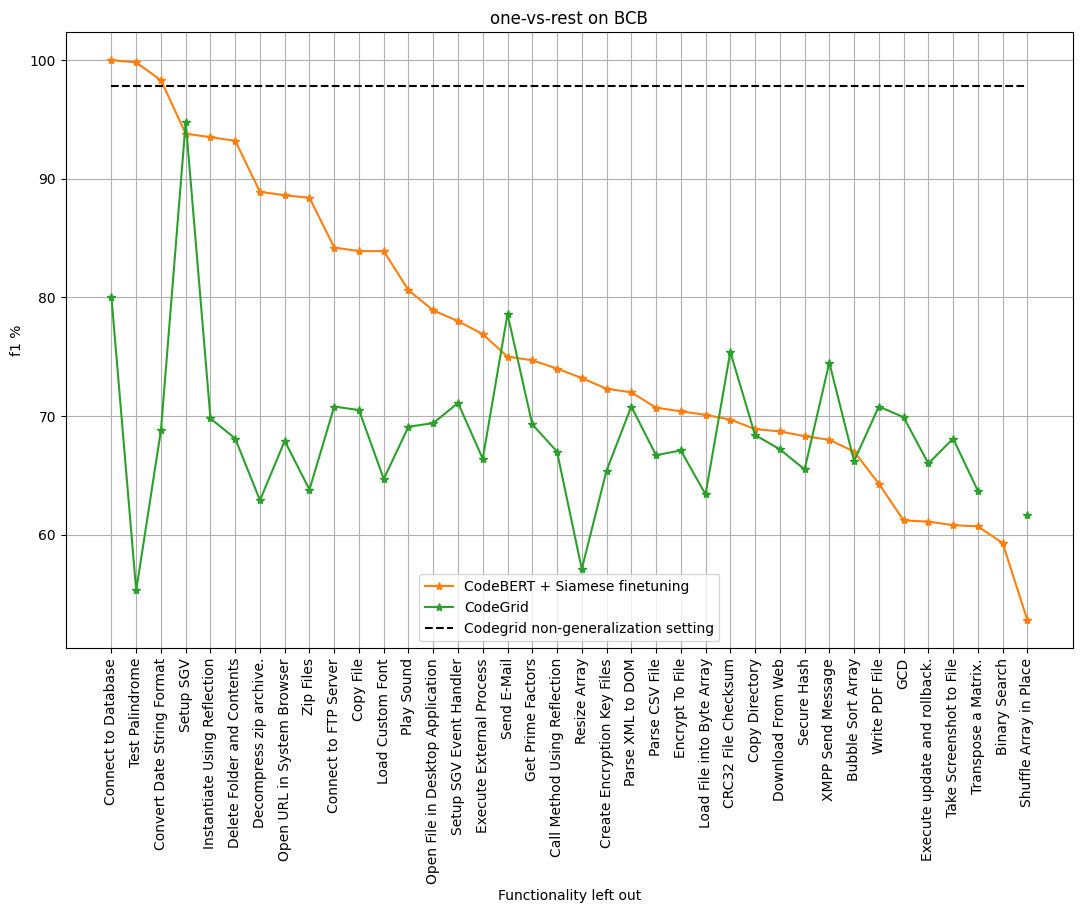

In [72]:
metric = 'f1'

d_sort = d.sort_values(metric+'_siam', ascending=False)
# d_sort = d.sort_values('test_size', ascending=False)
draw_performance_line(d_sort, metric, codegrid_non_gen_setting[metric])

In [73]:
print(d['f1_cg'].mean())
print(d['f1_cg'].median())
print(d['f1_siam'].mean())
print(d['f1_siam'].median())

68.54594594594596
68.1
76.16052631578947
73.6


In [34]:
colors

['#1f77b4', '#ff7f0e', '#2ca02c']

In [52]:
def draw_barplot(f1, acc, p, r, models, colors, title=''):
    # Colors for bars
    if len(models) == 2:
        colors = colors[1:]
        
    
    # Bar width
    bar_width = 0.9
    
    # Create positions for the bars
    bar_positions_f1  = np.arange(len(models))
    bar_positions_p   = bar_positions_f1 + len(models) + 1
    bar_positions_r   = bar_positions_p + len(models) + 1
    bar_positions_acc = bar_positions_r + len(models) + 1

    
    # Increase figure height
    fig, ax = plt.subplots(figsize=(13, 8))
    
    # Create a bar plot for F1 scores
    ax.bar(bar_positions_f1, f1, width=bar_width, color=colors, label='F1 Score')

    ax.bar(bar_positions_p, p, width=bar_width, color=colors, label='F1 Score')
    ax.bar(bar_positions_r, r, width=bar_width, color=colors, label='F1 Score')

    
    # Create a bar plot for accuracy scores
    ax.bar(bar_positions_acc, acc, width=bar_width, color=colors, label='Accuracy')


    if len(models) == 3:
        ax.plot([bar_positions_f1[0], bar_positions_f1[-1]], [codegrid_non_gen_setting['f1'], codegrid_non_gen_setting['f1']], colors[1], linestyle='--')
        ax.plot([bar_positions_p[0], bar_positions_p[-1]], [codegrid_non_gen_setting['p'], codegrid_non_gen_setting['p']], colors[1], linestyle='--')
        ax.plot([bar_positions_r[0], bar_positions_r[-1]], [codegrid_non_gen_setting['r'], codegrid_non_gen_setting['r']], colors[1], linestyle='--')
        ax.plot([bar_positions_acc[0], bar_positions_acc[-1]], [codegrid_non_gen_setting['a'], codegrid_non_gen_setting['a']], colors[1], linestyle='--')

        ax.plot([bar_positions_f1[0], bar_positions_f1[-1]], [codebert_non_gen_setting['f1'], codebert_non_gen_setting['f1']], colors[0], linestyle='--')
        ax.plot([bar_positions_p[0], bar_positions_p[-1]], [codebert_non_gen_setting['p'], codebert_non_gen_setting['p']], colors[0], linestyle='--')
        ax.plot([bar_positions_r[0], bar_positions_r[-1]], [codebert_non_gen_setting['r'], codebert_non_gen_setting['r']], colors[0], linestyle='--')
        ax.plot([bar_positions_acc[0], bar_positions_acc[-1]], [codebert_non_gen_setting['a'], codebert_non_gen_setting['a']], colors[0], linestyle='--')
    else:
        ax.plot([bar_positions_f1[0], bar_positions_f1[-1]], [codegrid_non_gen_setting['f1'], codegrid_non_gen_setting['f1']], colors[0], linestyle='--')
        ax.plot([bar_positions_p[0], bar_positions_p[-1]], [codegrid_non_gen_setting['p'], codegrid_non_gen_setting['p']], colors[0], linestyle='--')
        ax.plot([bar_positions_r[0], bar_positions_r[-1]], [codegrid_non_gen_setting['r'], codegrid_non_gen_setting['r']], colors[0], linestyle='--')
        ax.plot([bar_positions_acc[0], bar_positions_acc[-1]], [codegrid_non_gen_setting['a'], codegrid_non_gen_setting['a']], colors[0], linestyle='--')

        
    # Set axis labels and title
    ax.set_ylabel('%')

    ax.set_title(title)
    
    # Set x-axis ticks and labels
    ax.set_xticks([(bar_positions_f1[-1] + bar_positions_f1[0])/ 2,  (bar_positions_p[-1] + bar_positions_p[0]) / 2,  (bar_positions_r[-1] + bar_positions_r[0]) / 2, (bar_positions_acc[-1] + bar_positions_acc[0]) / 2])
    ax.set_xticklabels(['F1', 'Precision', 'Recall',  'Acc'])
    
    
    # Create a custom legend with model names and colors
    legend_elements = [plt.Line2D([0], [0], color=color, label=model) for model, color in zip(models, colors)]
    if len(models) == 3:
        legend_elements.append(plt.Line2D([0], [0], color=colors[1], label='CodeGrid non-generalization setting', linestyle='--'))
        legend_elements.append(plt.Line2D([0], [0], color=colors[0], label='CodeBERT non-generalization setting', linestyle='--'))
    else:
        legend_elements.append(plt.Line2D([0], [0], color=colors[0], label='CodeGrid non-generalization setting', linestyle='--'))


    ax.legend(handles=legend_elements, loc='upper right')
    
    # Show the plot
    plt.show()

### BCB --> SCB

In [53]:
f1  = [61, 64.9, 67.6]
acc = [54, 49.9, 54.0]
p   = [53, 50  , 85.8]
r   = [73, 92.5, 52.2]
       
models = ['CodeBERT + simple finetuning', 'CodeGrid', 'CodeBERT + siamese finetuning']

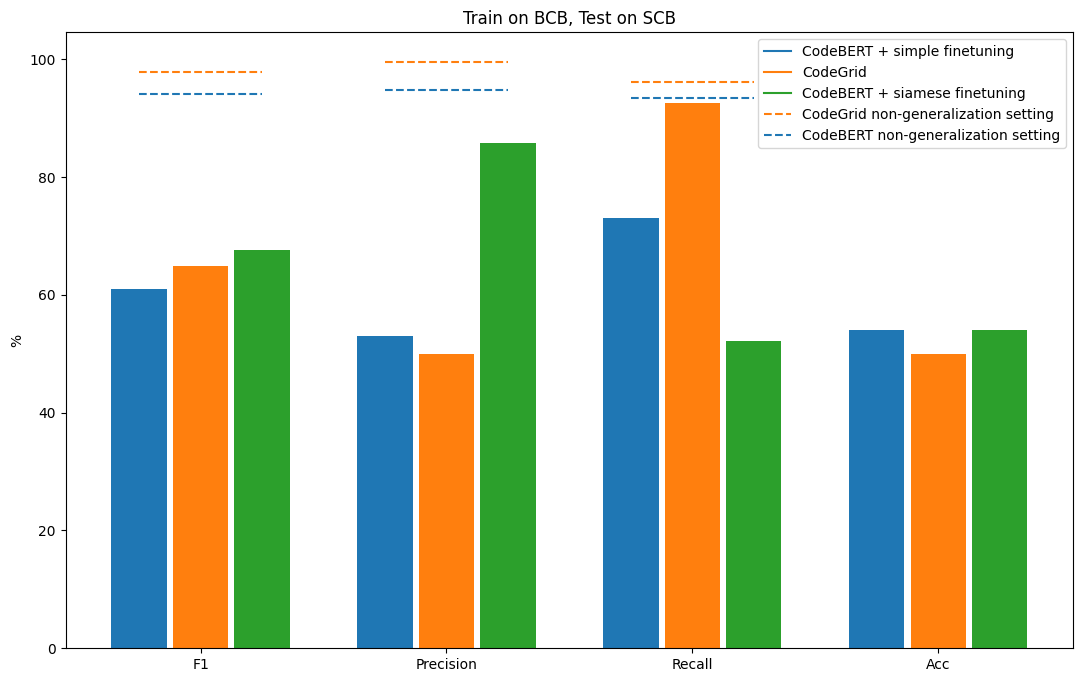

In [54]:
draw_barplot(f1, acc, p, r, models, colors, title='Train on BCB, Test on SCB')

$F_1 = 2*\frac{P  R}{P+R}$

### SCB --> BCB

In [55]:
f1  = [47.3, 68.6]
acc = [52.0, 58.4]
p   = [52.6, 89.2]
r   = [43.0, 55.0]
models = ['CodeGrid', 'CodeBERT + siamese finetuning']

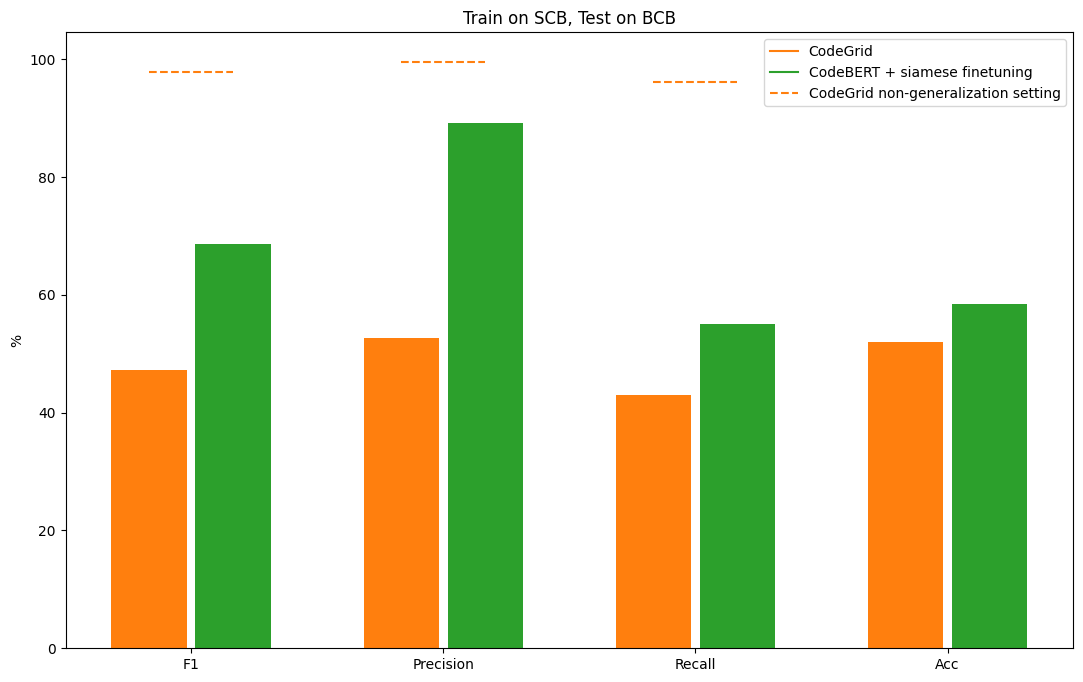

In [56]:
draw_barplot(f1, acc, p, r, models, colors, title='Train on SCB, Test on BCB')

### 